In [1]:
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv")

In [3]:
df.head(5)

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [4]:
df = df.sort_values(["Date"])

In [5]:
df["Data_Value"][1]/10

5.6

In [6]:
#  import numexpr as ne
df["Data_Value"] = df["Data_Value"]/10
# df["Data_Value"] = df["Data_Value"].div(10)

In [7]:
df.shape

(165085, 4)

In [8]:
# Leap years 2008, 2012
df = df[df.Date != "2012-02-29"]
df = df[df.Date != "2008-02-29"]

In [9]:
df.head(4)

,ID,Date,Element,Data_Value
60995,USW00004848,2005-01-01,TMIN,0.0
17153,USC00207320,2005-01-01,TMAX,15.0
17155,USC00207320,2005-01-01,TMIN,-1.1
10079,USW00014833,2005-01-01,TMIN,-4.4


In [10]:
df.Date = pd.to_datetime(df.Date)

In [11]:
df.head(4)

,ID,Date,Element,Data_Value
60995,USW00004848,2005-01-01,TMIN,0.0
17153,USC00207320,2005-01-01,TMAX,15.0
17155,USC00207320,2005-01-01,TMIN,-1.1
10079,USW00014833,2005-01-01,TMIN,-4.4


In [12]:
df['day'] = df['Date'].apply(lambda x: x.day)
df['month'] = df['Date'].apply(lambda x: x.month)

In [13]:
df2014 = df[df["Date"]<"2014-12-31"]

In [14]:
df2014.head(1)

,ID,Date,Element,Data_Value,day,month
60995,USW00004848,2005-01-01,TMIN,0.0,1,1


In [15]:
# df['Date'].dt.strftime('%B')

In [16]:
t= df2014.groupby(['day', 'month'])['Data_Value'].agg([('Min', 'min'),('Max', 'max')]).reset_index()

In [17]:
t= t.sort_values(['month', 'day' ], ascending=[True, True])

In [18]:
t.head(1)

,day,month,Min,Max
0,1,1,-16.0,15.6


In [19]:
#t is ready to be plotted

In [20]:
import calendar
t['month_s'] = t['month'].apply(lambda x: calendar.month_abbr[x])

In [21]:
t['num']=range(365)

In [22]:
t.head(5)

,day,month,Min,Max,month_s,num
0,1,1,-16.0,15.6,Jan,0
12,2,1,-26.7,13.9,Jan,1
24,3,1,-26.7,13.3,Jan,2
36,4,1,-26.1,10.6,Jan,3
48,5,1,-15.0,12.8,Jan,4


<IPython.core.display.Javascript object>


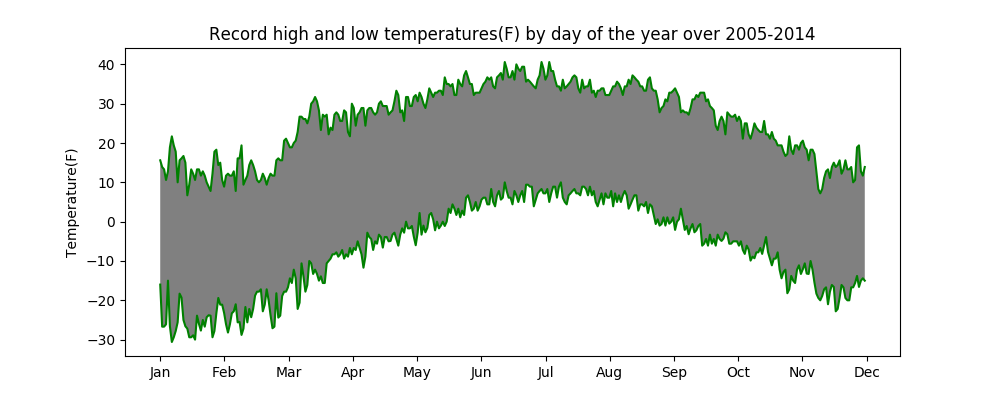

[Text(0, 0, 'Jan'),
 Text(0, 0, 'Feb'),
 Text(0, 0, 'Mar'),
 Text(0, 0, 'Apr'),
 Text(0, 0, 'May'),
 Text(0, 0, 'Jun'),
 Text(0, 0, 'Jul'),
 Text(0, 0, 'Aug'),
 Text(0, 0, 'Sep'),
 Text(0, 0, 'Oct'),
 Text(0, 0, 'Nov'),
 Text(0, 0, 'Dec')]

In [23]:
plt.figure(figsize=(10,4))

mon = t.month_s.unique()
h = np.linspace(start=0, stop=365, num=12)
# dts = pd.to_datetime(df2014.Date)
# fig,ax = plt.subplots()

plt.plot(t.num, t.Max, 'green', t.num, t.Min, 'green')

# plt.scatter(t.num, last['mini'], s=4)
# plt.scatter(t.num, last['maxi'], s=4)

# plt.xlabel('T')
plt.ylabel('Temperature(F)')
plt.title('Record high and low temperatures(F) by day of the year over 2005-2014')

# ax = plt.gca()

plt.gca().fill_between(t.num, 
                       t.Max, t.Min, 
                       facecolor='gray')
plt.gca().set_xticks(h)
plt.gca().set_xticklabels(mon)
# add a legend with legend entries (because we didn't have labels when we plotted the data series)



In [25]:
df2015 = df[df["Date"]>"2014-12-31"]

In [26]:
t1= df2015.groupby(['day', 'month'])['Data_Value'].agg([('Min', 'min'),('Max', 'max')]).reset_index()
t1= t1.sort_values(['month', 'day' ], ascending=[True, True])

In [27]:
t1['num']=range(365)

In [28]:
t1.head(5)

,day,month,Min,Max,num
0,1,1,-13.3,1.1,0
12,2,1,-12.2,3.9,1
24,3,1,-6.7,3.9,2
36,4,1,-8.8,4.4,3
48,5,1,-15.5,2.8,4


In [29]:
last=t.merge(t1, on= "num")

# min(t.Min, t1.Min)

In [30]:
last["mi"]=last[['Min_x', 'Min_y']].min(axis=1)
last["ma"]=last[['Max_x', 'Max_y']].min(axis=1) 

In [31]:
last.head(5)

,day_x,month_x,Min_x,Max_x,month_s,num,day_y,month_y,Min_y,Max_y,mi,ma
0,1,1,-16.0,15.6,Jan,0,1,1,-13.3,1.1,-16.0,1.1
1,2,1,-26.7,13.9,Jan,1,2,1,-12.2,3.9,-26.7,3.9
2,3,1,-26.7,13.3,Jan,2,3,1,-6.7,3.9,-26.7,3.9
3,4,1,-26.1,10.6,Jan,3,4,1,-8.8,4.4,-26.1,4.4
4,5,1,-15.0,12.8,Jan,4,5,1,-15.5,2.8,-15.5,2.8


In [32]:
last["mini"] =  np.nan
last["maxi"] =  np.nan

In [33]:
last.loc[last['Min_x'] > last['Min_y'], 'mini'] = last["Min_y"]
last.loc[last['Max_x'] < last['Max_y'], 'maxi'] = last["Max_y"]
# df.loc[df['A'] < df['B'], 'C'] = -1

<IPython.core.display.Javascript object>


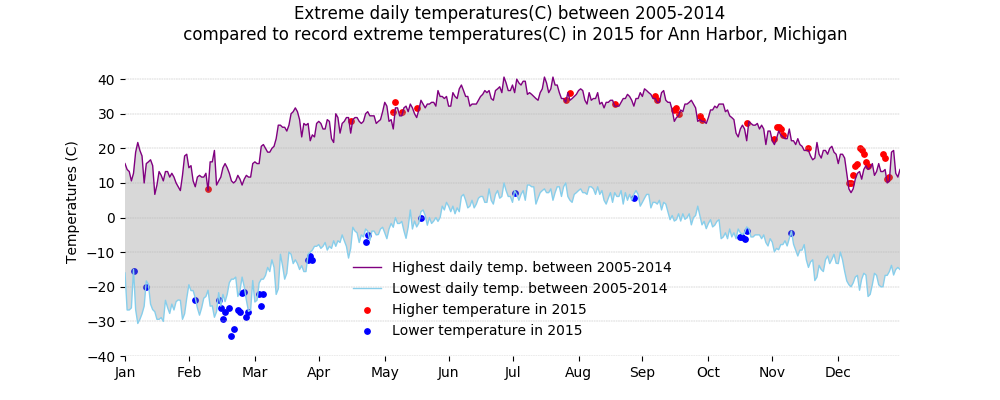

In [113]:
plt.figure(figsize=(10,4))

mon = t.month_s.unique()
h = np.linspace(start=0, stop=365, num=13)
h = np.round(h, 0)
h =h[:-1]

# dts = pd.to_datetime(df2014.Date)
# fig,ax = plt.subplots()

# plt.plot(t.num, t.Max, 'purple', t.num, t.Min, 'skyblue',linewidth=1.0)
plt.plot(t.num, t.Max, 'purple',linewidth=1.0, label="Highest daily temp. between 2005-2014")
plt.plot(t.num, t.Min, 'skyblue',linewidth=1.0, label="Lowest daily temp. between 2005-2014")


plt.scatter(t.num, last['maxi'], s=15, label="Higher temperature in 2015", color="red")
plt.scatter(t.num, last['mini'], s=15, label="Lower temperature in 2015", color="blue")



# plt.xlabel('T')
plt.ylabel('Temperatures (C)')
plt.title('Extreme daily temperatures(C) between 2005-2014 \n compared to record extreme temperatures(C) in 2015 for Ann Harbor, Michigan')

# ax = plt.gca()

plt.margins(0,0)
# plt.gca().xaxis.set_major_locator(plt.NullLocator())
# plt.gca().yaxis.set_major_locator(plt.NullLocator())


plt.gca().fill_between(t.num, 
                       t.Max, t.Min, 
                       facecolor='gray', alpha = 0.3)
plt.gca().set_xticks(h)
plt.gca().set_xticklabels(mon)

plt.gca().set_ylim(ymin=-40, ymax=49)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.legend(bbox_to_anchor=(0.50,0.35), frameon = False, shadow = False)

plt.grid(linestyle= 'dashed', linewidth=0.33, axis = 'y')



In [ ]:
t1= df2014.groupby(df2014['Date'].dt.strftime('%B%d'))['Data_Value'].agg([('Min', 'min'),('Max', 'max')]).reset_index(level=0)

In [ ]:
t1.head(5)

In [ ]:
t1["Month"] = pd.to_datetime(t1.Date, format='%B%d', errors='coerce').dt.month
# df = df.sort_values(by="Month")

In [ ]:
t1.head(5)

In [ ]:
df1 = df.groupby(["Date"]).agg({'Data_Value': {'mindate': np.min, 'maxdate': np.max}})

In [ ]:
df1 = df.groupby(["Date"])['Data_Value'].agg([('Min', 'min'), ('Max', 'max')])

# groupby(['Day'])['Data_Value'].agg([('Min' , 'min'), ('Max', 'max')])

In [ ]:
df1.reset_index(level=0, inplace=True)

In [ ]:
df1

For this assignment, you must:

   1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
   
   2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
   
   3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
    
   4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.


In [ ]:
# df.Date.min()
# df.Date.max()

In [ ]:
# ma = df[df.Element == "TMAX"]
# mi = df[df.Element == "TMIN"]

In [ ]:
# df.groupby('Element')

In [ ]:
df1.head()
# over the period 2005-2014



In [83]:
h = np.linspace(start=0, stop=365, num=13)
h = np.round(h, 0)
# round(h)
# array([  0.        ,  30,  60.83333333,  91.25      ,
#        121.66666667, 152.08333333, 182.5       , 212.91666667,
#        243.33333333, 273.75      , 304.16666667, 334.58333333,
#        365.        ])

array([  0.,  30.,  61.,  91., 122., 152., 182., 213., 243., 274., 304.,
       335., 365.])

In [ ]:
plt.figure(figsize=(10,4))
dts = pd.to_datetime(df2014.Date)


plt.plot(dts, df2014.Max, 'gray', dts, df2014.Min, 'gray')

plt.gca().fill_between(df2014.Date, 
                       df2014.Max, df2014.Min, 
                       facecolor='gray')
# plt.xlabel('T')
plt.ylabel('Temperature(F)')
plt.title('Record high and low temperatures(F) by day of the year over 2005-2014')
# add a legend with legend entries (because we didn't have labels when we plotted the data series)


Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.

Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.

Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.

Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.


In [ ]:
df2015 = df1[df1["Date"]>"2014-12-31"] 

In [ ]:
plt.figure(figsize=(10,4))
dts = pd.to_datetime(df2014.Date)


plt.plot(dts, df2014.Max, 'gray', dts, df2014.Min, 'gray')

plt.gca().fill_between(df2014.Date, 
                       df2014.Max, df2014.Min, 
                       facecolor='gray')
# plt.xlabel('T')
plt.ylabel('Temperature(F)')
plt.title('Record high and low temperatures(F) by day of the year over 2005-2014')


dts15 = pd.to_datetime(df2015.Date)
plt.plot(dts15, df2015.Max, '-o', dts2015. df2015.Min, '-o')